In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import scipy.stats as stats
from run_stats import *

##### Smell Rating

In [2]:
survey_data = pd.read_excel("./Experimental_Data_revised.xlsx", 'Surveys')

Smell Rating

Neutral: [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0]
Lemon: [3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.5]
Fish: [1.0, 1.5, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0]

Neutral, num elements: 8, mean: 3.125, std: 0.33071891388307384, normal (above 0.05 is normal): 1.0472282383489073e-06
Lemon, num elements: 10, mean: 3.75, std: 0.51234753829798, normal (above 0.05 is normal): 0.003651990322396159
fish, num elements: 10, mean: 2.45, std: 0.85, normal (above 0.05 is normal): 0.4456087648868561
Kruskal-Wallis: H 12.160414657666351, P VAL: 0.0022877022971021393

neutral v fish | U-stat: 58.5, p-val: 0.06796686314107997, effect size: 0.9486832980505135, other effect size: 0.903507902905251
neutral v lemon | U-stat: 16.5, p-val: 0.02001910947636308, effect size: -1.3363062095621219, other effect size: -1.272672580535354
fish v lemon | U-stat: 12.0, p-val: 0.003006463006392221, effect size: -1.7573630453313984, other effect size: -1.6831082687681



/Users/zacharykaras/Desktop/Projects/vandy/smell_study/replication_package/run_stats.py:158: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  neut_list = neut_list.replace(' ', np.nan).dropna()


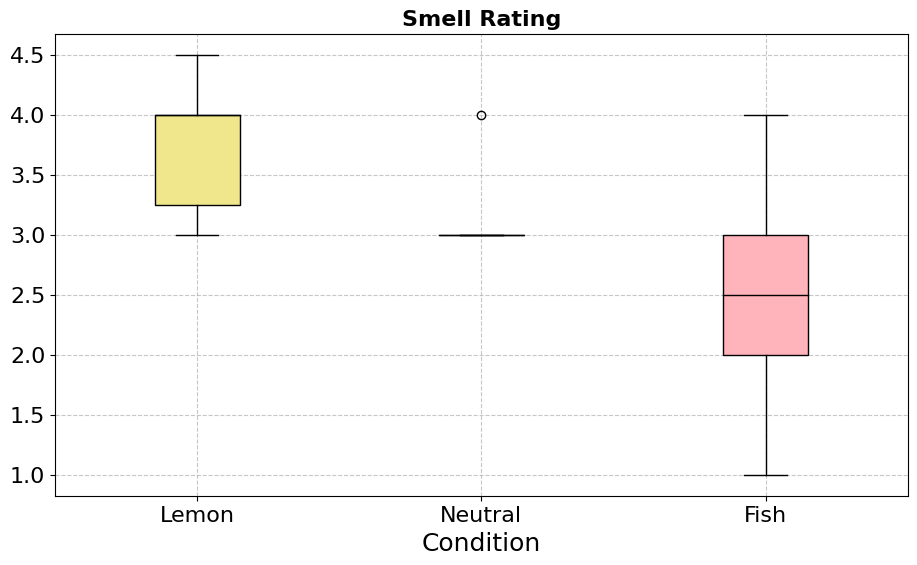

In [3]:
fish, lemon, neutral = make_three_group_lists(survey_data, 'RATING')
ratings = three_lists_stats(fish, lemon, neutral, 'Smell Rating')

CPP

Neutral: [1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 3.0]
Lemon: [1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0]
Fish: [1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]

Neutral, num elements: 10, mean: 1.8, std: 0.8717797887081347, normal (above 0.05 is normal): 0.004218838177621365
Lemon, num elements: 10, mean: 2.1, std: 0.7, normal (above 0.05 is normal): 0.035864491015672684
fish, num elements: 10, mean: 2.0, std: 0.4472135954999579, normal (above 0.05 is normal): 0.00027618114836513996
Kruskal-Wallis: H 0.9559683794466293, P VAL: 0.6200319997819717



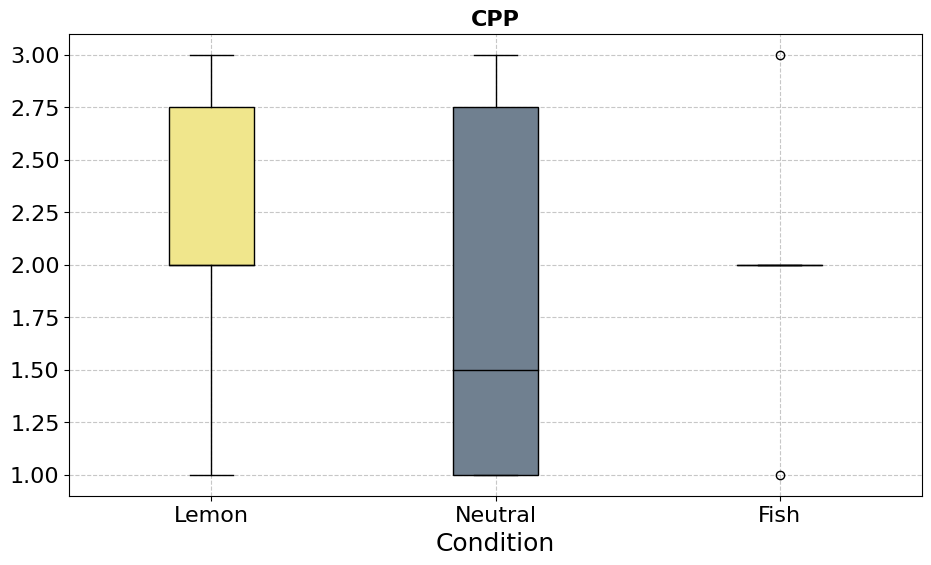

In [4]:
fish, lemon, neutral = make_three_group_lists(survey_data, 'CPP_Experience')
yrs_experience = three_lists_stats(fish, lemon, neutral, 'CPP')

GPA

Neutral: [3.0, 3.2, 3.2, 3.5, 3.7, 3.7, 3.8, 3.9, 3.92, 3.97]
Lemon: [3.6, 3.6, 3.7, 3.7, 3.8, 3.8, 3.83, 3.87, 3.93, 3.982]
Fish: [3.0, 3.6, 3.6, 3.8, 3.83, 3.88, 3.9, 3.9, 4.0, 4.0]

Neutral, num elements: 10, mean: 3.589, std: 0.32834280866192267, normal (above 0.05 is normal): 0.175278902053833
Lemon, num elements: 10, mean: 3.7812000000000006, std: 0.12340567247902344, normal (above 0.05 is normal): 0.6543071866035461
fish, num elements: 10, mean: 3.751, std: 0.2834237110758378, normal (above 0.05 is normal): 0.00542928883805871
Kruskal-Wallis: H 1.6767556652456894, P VAL: 0.4324113984711837



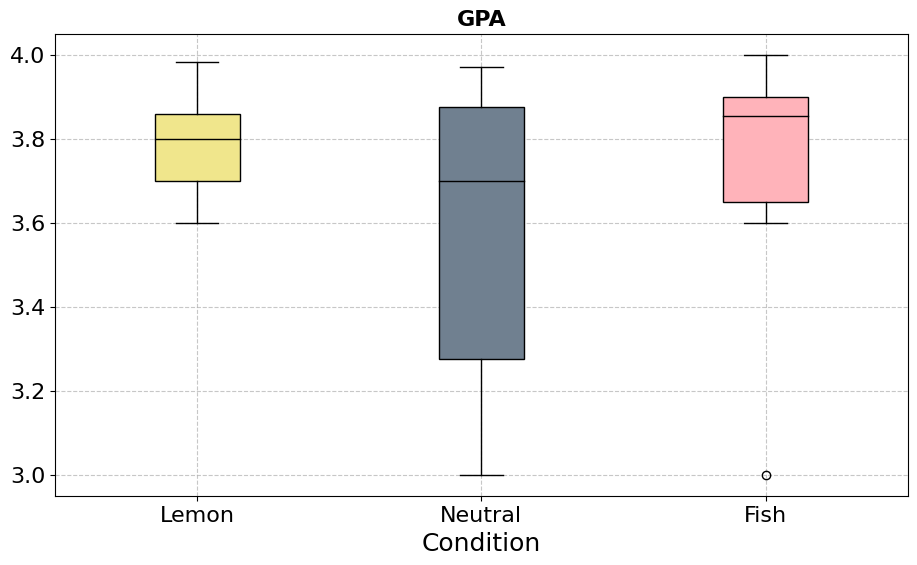

In [5]:
fish, lemon, neutral = make_three_group_lists(survey_data, 'GPA')
gpa = three_lists_stats(fish, lemon, neutral, 'GPA')

AGE

Neutral: [18.0, 19.0, 20.0, 20.0, 21.0, 21.0, 21.0, 21.0, 22.0, 23.0]
Lemon: [19.0, 19.0, 20.0, 20.0, 20.0, 20.0, 21.0, 21.0, 21.0, 22.0]
Fish: [19.0, 20.0, 20.0, 20.0, 21.0, 21.0, 21.0, 21.0, 22.0, 22.0]

Neutral, num elements: 10, mean: 20.6, std: 1.3564659966250538, normal (above 0.05 is normal): 0.7316085696220398
Lemon, num elements: 10, mean: 20.3, std: 0.9000000000000001, normal (above 0.05 is normal): 0.28687137365341187
fish, num elements: 10, mean: 20.7, std: 0.9, normal (above 0.05 is normal): 0.286869615316391
ANOVA F: 0.33815028901734107, P VAL: 0.7160647498401089



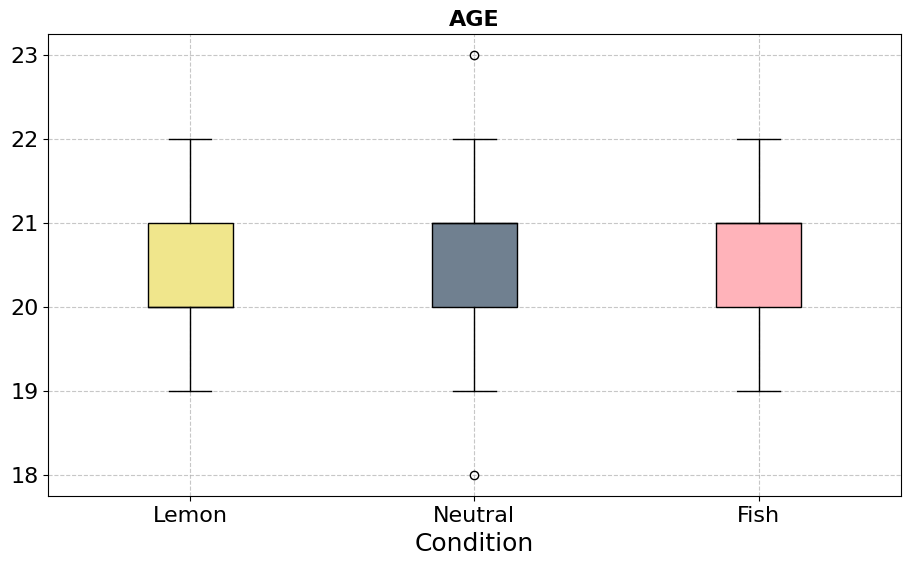

In [6]:
fish, lemon, neutral = make_three_group_lists(survey_data, 'AGE')
age = three_lists_stats(fish, lemon, neutral, 'AGE')

## RQ1: COGNITIVE EFFORT

#### Variables

In [7]:
relevant_columns = ['neutral_fc',  'lemon_fc',   'fish_fc', 
                    'neutral_avfd','lemon_avfd', 'fish_avfd']

### CODE COMPREHENSION

Fixation Count

Neutral: [1261.0, 1596.0, 1843.0, 1941.0, 1972.0, 1990.0, 2222.0, 2341.0, 3530.0, 4362.0]
Lemon: [1309.0, 1764.0, 1941.0, 1979.0, 2143.0, 2168.0, 2380.0, 2398.0, 2612.0, 3723.0]
Fish: [1452.0, 1576.0, 1710.0, 1917.0, 2408.0, 2791.0, 3173.0, 3230.0, 3408.0, 4529.0]

Neutral, num elements: 10, mean: 2305.8, std: 888.1848681440143, normal (above 0.05 is normal): 0.03254260867834091
Lemon, num elements: 10, mean: 2241.7, std: 603.9586161319334, normal (above 0.05 is normal): 0.22040298581123352
fish, num elements: 10, mean: 2619.4, std: 937.7518008513767, normal (above 0.05 is normal): 0.4714890420436859
Kruskal-Wallis: H 0.5736760124610634, P VAL: 0.7506333169090417

Average Fixation Duration

Neutral: [166.9878048780488, 174.63636363636363, 189.2962962962963, 192.88, 202.38372093023256, 204.35, 217.14634146341464, 219.98823529411766, 226.43023255813952, 229.77777777777777]
Lemon: [191.74683544303798, 192.09459459459458, 214.18072289156626, 217.15116279069767, 222.25974025

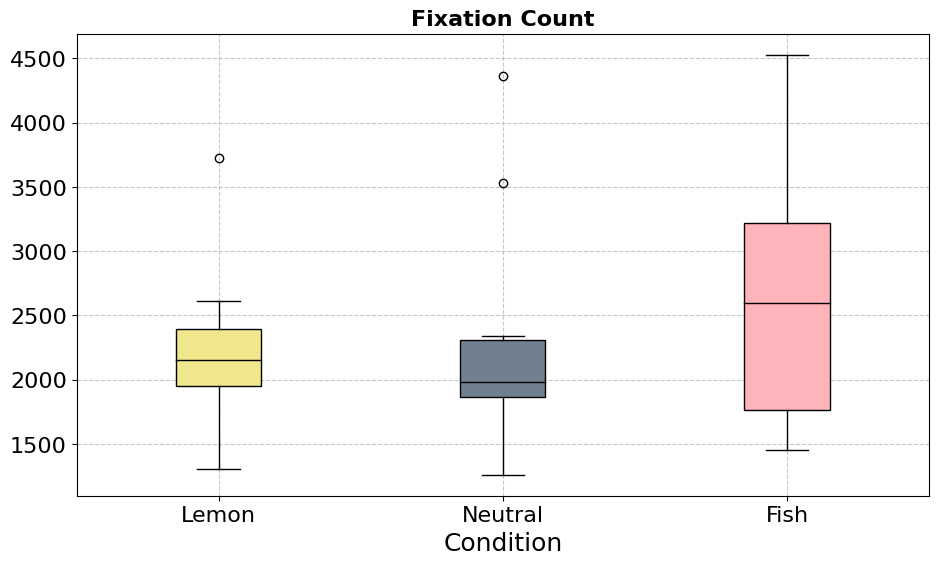

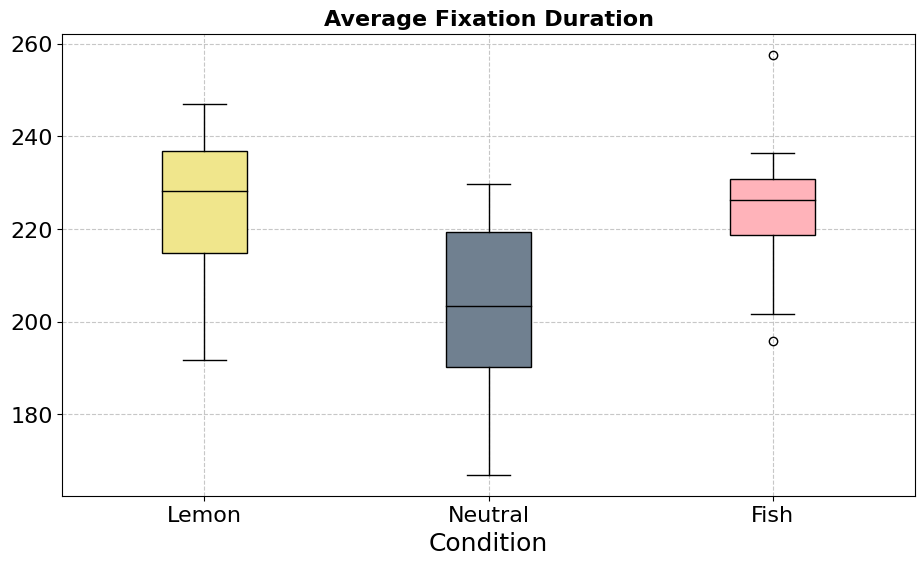

In [8]:
# found in 'tobii metrics' folder
cc_df = pd.read_excel("tobii_metrics/code_summary.xlsx")
output_comp = calculate_stats(cc_df, relevant_columns)
# calculate_stats(cc_df)

In [9]:
output_comp.keys()

dict_keys(['Fixation Count', 'Average Fixation Duration'])

Fixation Count

Neutral: [1261.0, 1596.0, 1843.0, 1941.0, 1972.0, 1990.0, 2222.0, 2341.0]
Lemon: [1309.0, 1764.0, 1941.0, 1979.0, 2143.0, 2168.0, 2380.0, 2398.0, 2612.0]
Fish: [1452.0, 1576.0, 1710.0, 1917.0, 2408.0, 2791.0, 3173.0, 3230.0, 3408.0, 4529.0]

Neutral, num elements: 8, mean: 1895.75, std: 319.5644496811246, normal (above 0.05 is normal): 0.6674665808677673
Lemon, num elements: 9, mean: 2077.1111111111113, std: 366.6067964589262, normal (above 0.05 is normal): 0.7982224225997925
fish, num elements: 10, mean: 2619.4, std: 937.7518008513767, normal (above 0.05 is normal): 0.4714890420436859
Kruskal-Wallis: H 2.642572519083953, P VAL: 0.2667919175227992

Average Fixation Duration

Neutral: [166.9878048780488, 174.63636363636363, 189.2962962962963, 192.88, 202.38372093023256, 204.35, 217.14634146341464, 219.98823529411766, 226.43023255813952, 229.77777777777777]
Lemon: [191.74683544303798, 192.09459459459458, 214.18072289156626, 217.15116279069767, 222.25974025974025, 234.0235

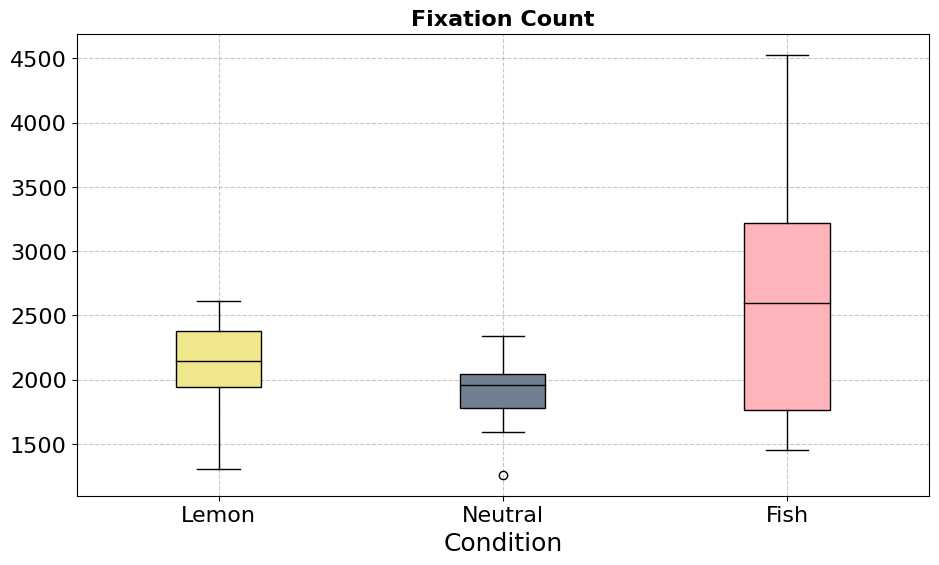

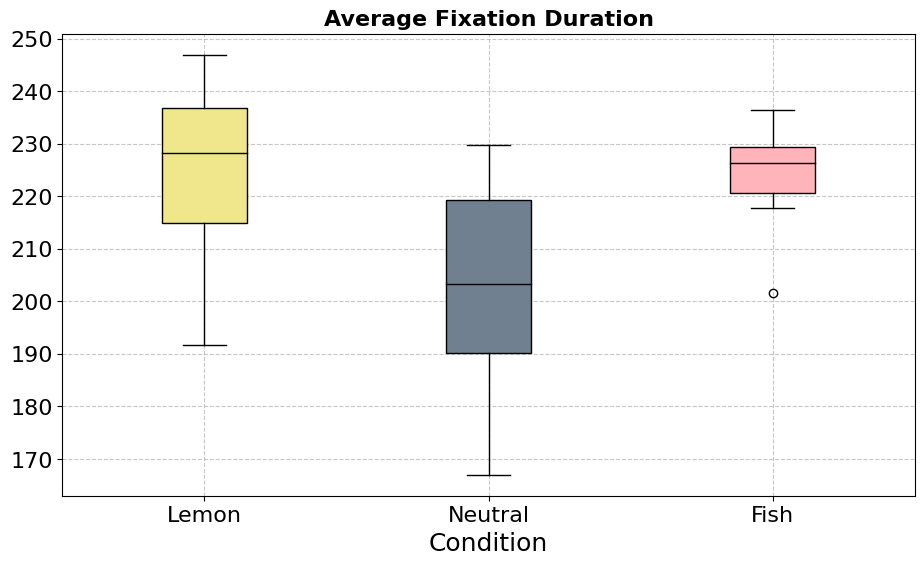

In [10]:
# need to remove the following
# fixation count: lemon - max value, neutral - top two values
output_comp['Fixation Count']['lemon'] = output_comp['Fixation Count']['lemon'][:-1]
output_comp['Fixation Count']['neutral'] = output_comp['Fixation Count']['neutral'][:-2]
# calculating stats
fish = pd.Series(output_comp['Fixation Count']['fish'])
lemon = pd.Series(output_comp['Fixation Count']['lemon'])
neutral = pd.Series(output_comp['Fixation Count']['neutral'])
output_comp['Fixation Count'] = three_lists_stats(fish, lemon, neutral, 'Fixation Count')


# average fixation duration: fish - max and min values
output_comp['Average Fixation Duration']['fish'] = output_comp['Average Fixation Duration']['fish'][1:-1]
# calculating stats
fish = pd.Series(output_comp['Average Fixation Duration']['fish'])
lemon = pd.Series(output_comp['Average Fixation Duration']['lemon'])
neutral = pd.Series(output_comp['Average Fixation Duration']['neutral'])
output_comp['Average Fixation Duration'] = three_lists_stats(fish, lemon, neutral, 'Average Fixation Duration')



### CODE WRITING

Fixation Count

Neutral: [35.0, 1052.0, 1283.0, 1302.0, 1342.0, 1376.0, 1675.0, 2293.0, 2296.0, 2348.0]
Lemon: [565.0, 786.0, 1238.0, 1443.0, 1569.0, 1683.0, 1694.0, 1706.0, 1996.0, 2068.0]
Fish: [750.0, 833.0, 857.0, 1030.0, 1218.0, 1229.0, 1320.0, 1433.0, 1550.0, 1742.0]

Neutral, num elements: 10, mean: 1500.2, std: 669.7578368335827, normal (above 0.05 is normal): 0.17683860659599304
Lemon, num elements: 10, mean: 1474.8, std: 462.22565917525606, normal (above 0.05 is normal): 0.29653239250183105
fish, num elements: 10, mean: 1196.2, std: 311.4019267763127, normal (above 0.05 is normal): 0.778319776058197
ANOVA F: 1.0116659225493472, P VAL: 0.37698381517452223

Average Fixation Duration

Neutral: [342.4980118, 384.6118885, 453.8773342, 472.1630392, 520.5259363, 521.3725347, 555.0175418, 589.96423, 2201.459006, 143321.6694]
Lemon: [550.7386556, 574.6721806, 582.5956899, 613.9304755, 660.1257166, 667.7876112, 699.8436947, 1202.32475, 3727.65758, 6256.907552]
Fish: [400.1167122, 514.5

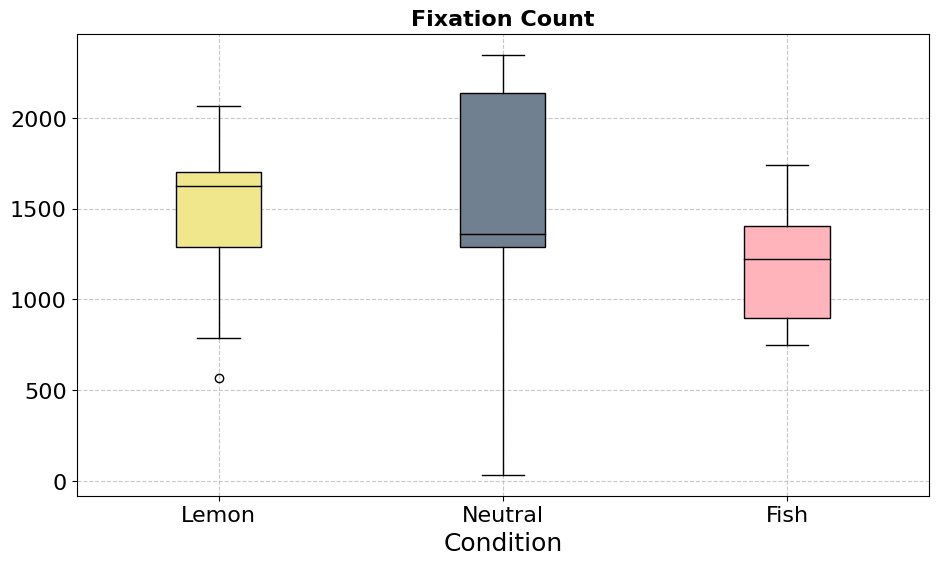

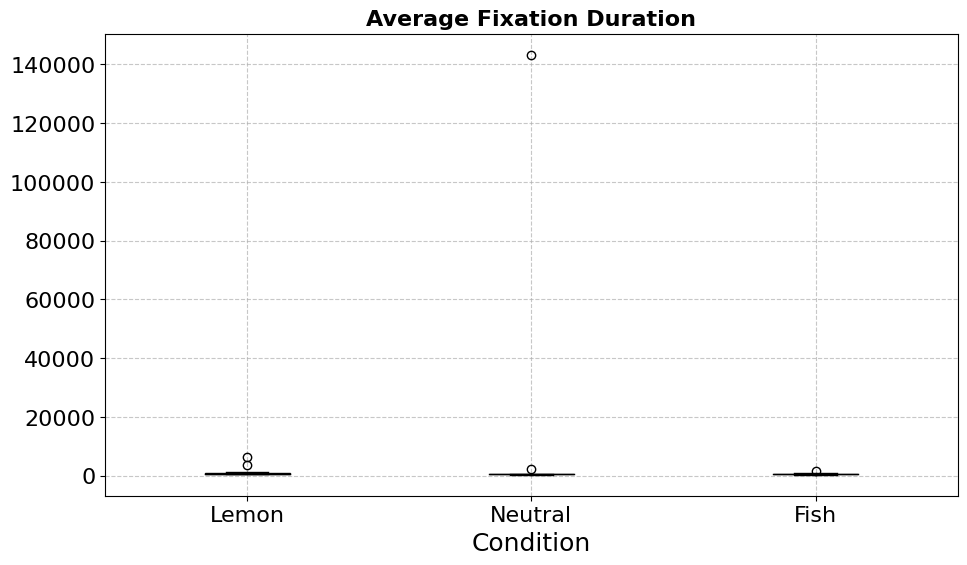

In [11]:
# found in writingFixations folder
w_df = pd.read_csv("writingFixations/all_itrace_counts.csv")
output_writing = calculate_stats(w_df, relevant_columns)


Fixation Count

Neutral: [35.0, 1052.0, 1283.0, 1302.0, 1342.0, 1376.0, 1675.0, 2293.0, 2296.0, 2348.0]
Lemon: [786.0, 1238.0, 1443.0, 1569.0, 1683.0, 1694.0, 1706.0, 1996.0, 2068.0]
Fish: [750.0, 833.0, 857.0, 1030.0, 1218.0, 1229.0, 1320.0, 1433.0, 1550.0, 1742.0]

Neutral, num elements: 10, mean: 1500.2, std: 669.7578368335827, normal (above 0.05 is normal): 0.17683860659599304
Lemon, num elements: 9, mean: 1575.888888888889, std: 367.69838015067745, normal (above 0.05 is normal): 0.4930122494697571
fish, num elements: 10, mean: 1196.2, std: 311.4019267763127, normal (above 0.05 is normal): 0.778319776058197
ANOVA F: 1.5272384211762093, P VAL: 0.2359846448058847

Average Fixation Duration

Neutral: [342.4980118, 384.6118885, 453.8773342, 472.1630392, 520.5259363, 521.3725347, 555.0175418, 589.96423]
Lemon: [550.7386556, 574.6721806, 582.5956899, 613.9304755, 660.1257166, 667.7876112, 699.8436947, 1202.32475]
Fish: [400.1167122, 514.5814274, 547.3671197, 578.2128061, 601.2039736, 613

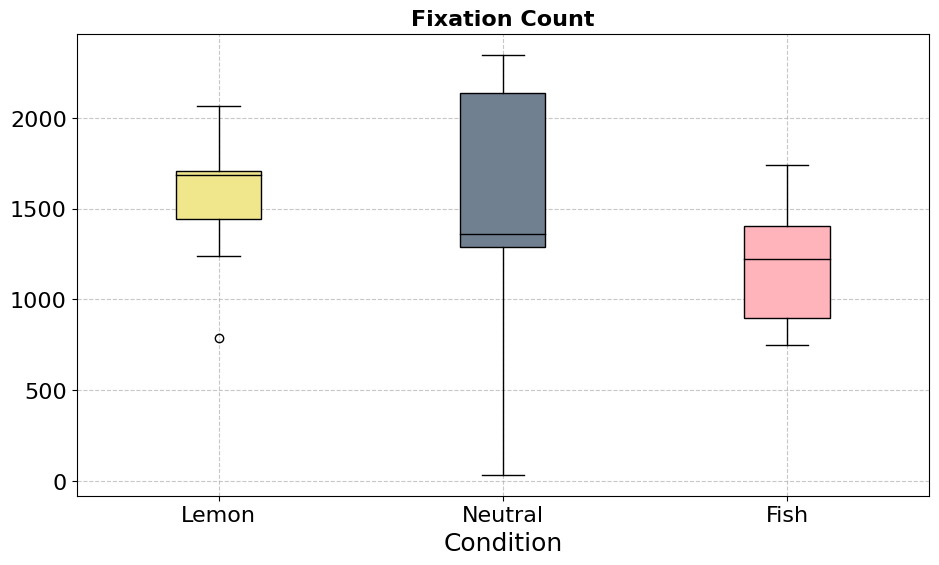

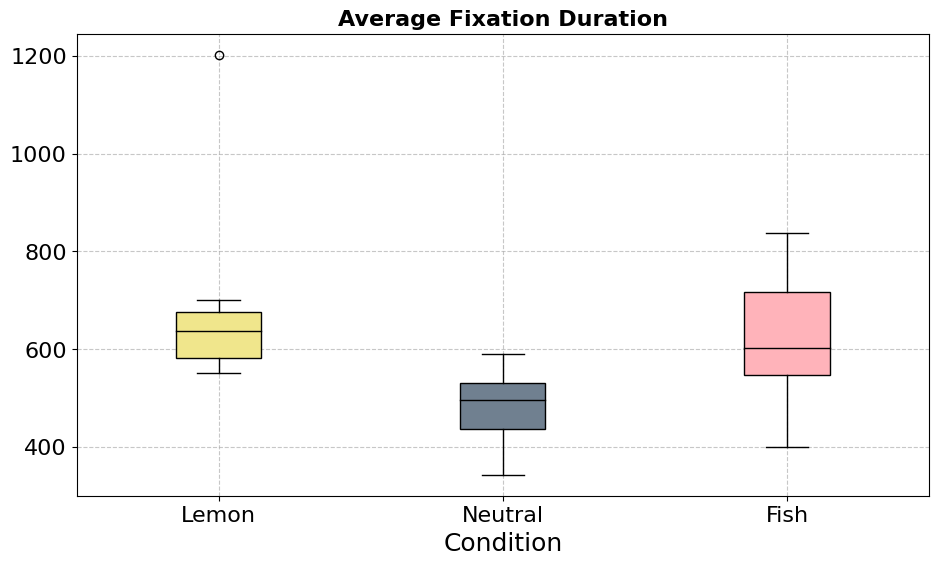

In [12]:
# need to remove the following
# fixation count - lemon: min value
output_writing['Fixation Count']['lemon'] = output_writing['Fixation Count']['lemon'][1:]

# calculating stats
fish = pd.Series(output_writing['Fixation Count']['fish'])
lemon = pd.Series(output_writing['Fixation Count']['lemon'])
neutral = pd.Series(output_writing['Fixation Count']['neutral'])
filtered_fc = three_lists_stats(fish, lemon, neutral, 'Fixation Count')
output_writing['Fixation Count'] = filtered_fc['Fixation Count']

# average fixation duration - lemon: 2 max vlaues, neutral: 2 max values, fish: max value
output_writing['Average Fixation Duration']['fish'] = output_writing['Average Fixation Duration']['fish'][:-1]
output_writing['Average Fixation Duration']['lemon'] = output_writing['Average Fixation Duration']['lemon'][:-2]
output_writing['Average Fixation Duration']['neutral'] = output_writing['Average Fixation Duration']['neutral'][:-2]

# calculating stats
fish = pd.Series(output_writing['Average Fixation Duration']['fish'])
lemon = pd.Series(output_writing['Average Fixation Duration']['lemon'])
neutral = pd.Series(output_writing['Average Fixation Duration']['neutral'])
filtered_fd = three_lists_stats(fish, lemon, neutral, 'Average Fixation Duration')
output_writing['Average Fixation Duration'] = filtered_fd['Average Fixation Duration']


### Reading Comprehension

Fixation Count

Neutral: [946.0, 1051.0, 1098.0, 1637.0, 1669.0, 1866.0, 1875.0, 2179.0, 2383.0, 3448.0]
Lemon: [1336.0, 1340.0, 1609.0, 1769.0, 1790.0, 1830.0, 1931.0, 2038.0, 2230.0, 2316.0]
Fish: [1512.0, 1819.0, 1918.0, 1937.0, 1981.0, 1989.0, 2056.0, 2214.0, 2412.0, 2587.0]

Neutral, num elements: 10, mean: 1815.2, std: 709.5037420620133, normal (above 0.05 is normal): 0.2938031554222107
Lemon, num elements: 10, mean: 1818.9, std: 314.12209409718383, normal (above 0.05 is normal): 0.6751418113708496
fish, num elements: 10, mean: 2042.5, std: 287.62171336670673, normal (above 0.05 is normal): 0.7620546221733093
ANOVA F: 0.6681445747592891, P VAL: 0.5209315329431605

Average Fixation Duration

Neutral: [173.22916666666666, 177.0, 180.9298245614035, 182.2258064516129, 201.08928571428572, 204.72881355932202, 208.4655172413793, 210.56603773584905, 214.1451612903226, 225.63793103448276]
Lemon: [186.1206896551724, 186.75, 191.3272727272727, 195.41176470588235, 208.03703703703704, 218.298

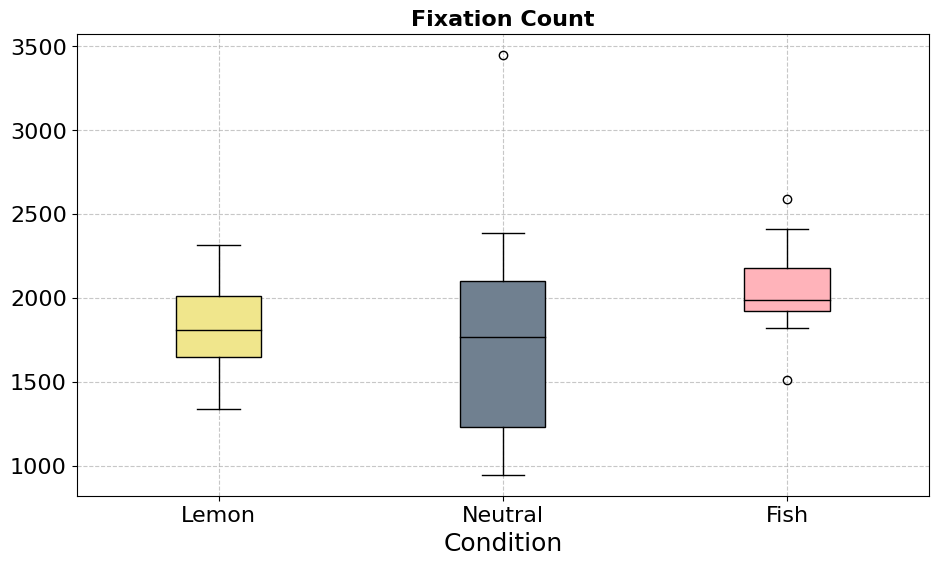

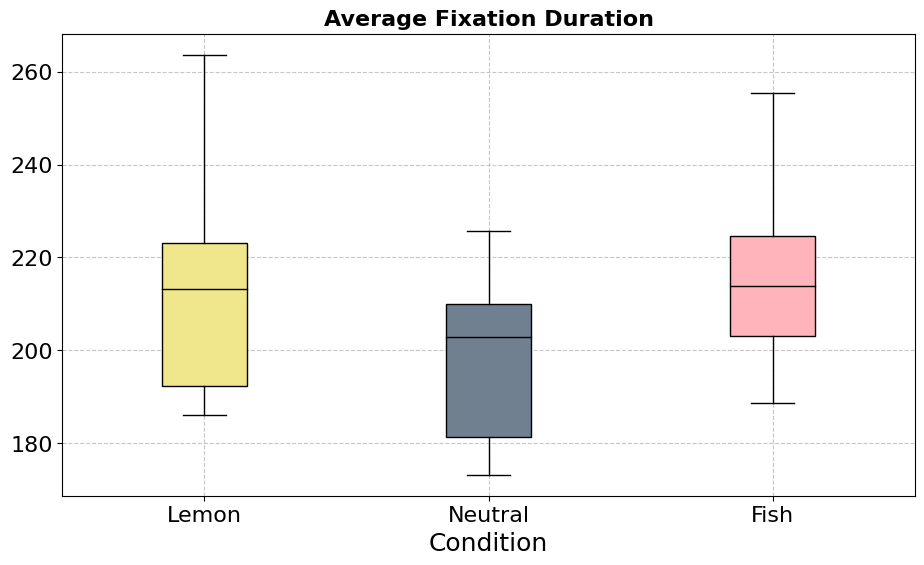

In [13]:
prose_df = pd.read_excel("tobii_metrics/prose_summary.xlsx")
output_prose = calculate_stats(prose_df, relevant_columns)


Fixation Count

Neutral: [946.0, 1051.0, 1098.0, 1637.0, 1669.0, 1866.0, 1875.0, 2179.0, 2383.0]
Lemon: [1336.0, 1340.0, 1609.0, 1769.0, 1790.0, 1830.0, 1931.0, 2038.0, 2230.0, 2316.0]
Fish: [1819.0, 1918.0, 1937.0, 1981.0, 1989.0, 2056.0, 2214.0, 2412.0]

Neutral, num elements: 9, mean: 1633.7777777777778, std: 479.7792959679546, normal (above 0.05 is normal): 0.47381776571273804
Lemon, num elements: 10, mean: 1818.9, std: 314.12209409718383, normal (above 0.05 is normal): 0.6751418113708496
fish, num elements: 8, mean: 2040.75, std: 176.53877052930895, normal (above 0.05 is normal): 0.28926393389701843
ANOVA F: 2.5457824685258506, P VAL: 0.09938707089547198



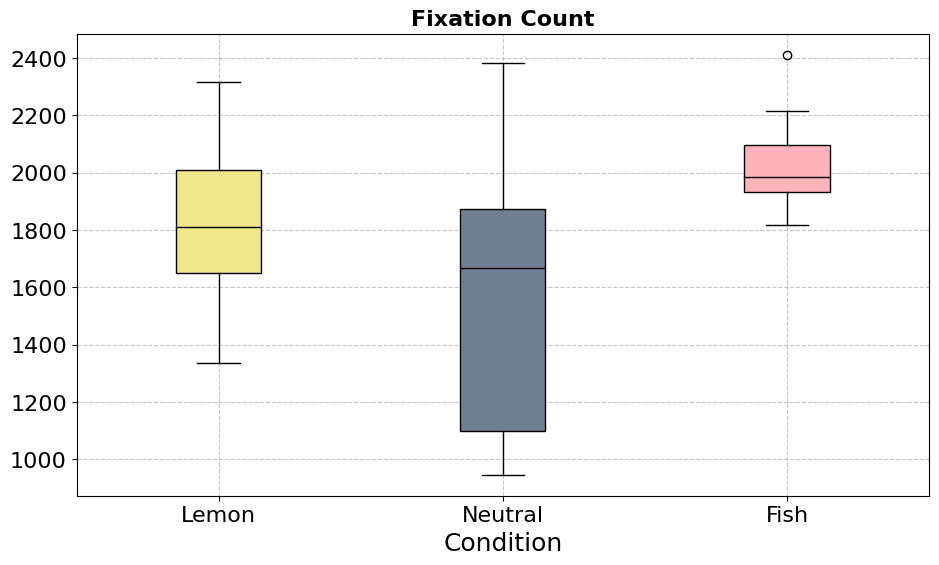

In [14]:
# need to remove the following
# fixation count - neutral: max value, fish: max and min values
output_prose['Fixation Count']['neutral'] = output_prose['Fixation Count']['neutral'][:-1]
output_prose['Fixation Count']['fish'] = output_prose['Fixation Count']['fish'][1:-1]

# calculating stats
fish = pd.Series(output_prose['Fixation Count']['fish'])
lemon = pd.Series(output_prose['Fixation Count']['lemon'])
neutral = pd.Series(output_prose['Fixation Count']['neutral'])
filtered_fc = three_lists_stats(fish, lemon, neutral, 'Fixation Count')
output_prose['Fixation Count'] = filtered_fc['Fixation Count']


### SACCADES

In [15]:
task_data = pd.read_excel("Experimental_Data_revised.xlsx", "Tasks")

In [16]:
fish_idx = np.where(task_data['CONDITION'] == 'bad')
lemon_idx = np.where(task_data['CONDITION'] == 'good')
neutral_idx = np.where(task_data['CONDITION'] == 'neutral')

fish_ppl = list(task_data.loc[fish_idx, 'ID'])
lemon_ppl = list(task_data.loc[lemon_idx, 'ID'])
neutral_ppl = list(task_data.loc[neutral_idx, 'ID'])

In [17]:
with open("midprocessing/ccd_saccades.pkl", 'rb') as f:
    ccd_saccades = pickle.load(f)
    
with open("midprocessing/prose_saccades.pkl", 'rb') as f:
    prose_saccades = pickle.load(f)
    
with open("midprocessing/writing_saccades.pkl", 'rb') as f:
    writing_saccades = pickle.load(f)

Saccades: Prose Comprehension

Neutral: [1986.0, 2118.0, 2374.0, 2397.0, 3197.0, 3326.0, 3396.0, 3473.0, 4266.0, 4675.0]
Lemon: [2074.0, 2381.0, 2450.0, 2641.0, 2762.0, 2912.0, 2980.0, 3247.0, 3276.0, 3378.0]
Fish: [2811.0, 3012.0, 3165.0, 3306.0, 3385.0, 3402.0, 3403.0, 3544.0, 3636.0, 3656.0]

Neutral, num elements: 10, mean: 3120.8, std: 857.3033068873583, normal (above 0.05 is normal): 0.43632566928863525
Lemon, num elements: 10, mean: 2810.1, std: 406.9711169112619, normal (above 0.05 is normal): 0.787153959274292
fish, num elements: 10, mean: 3332.0, std: 256.4160681392646, normal (above 0.05 is normal): 0.4946610629558563
Kruskal-Wallis: H 6.072258064516134, P VAL: 0.04802041565960379

neutral v fish | U-stat: 39.0, p-val: 0.4273553138978077, effect size: -0.31665789998523325, other effect size: -0.30327798871825157
neutral v lemon | U-stat: 60.0, p-val: 0.47267559351158717, effect size: 0.43925111509412895, other effect size: 0.42069120882254607
fish v lemon | U-stat: 88.0, p-v

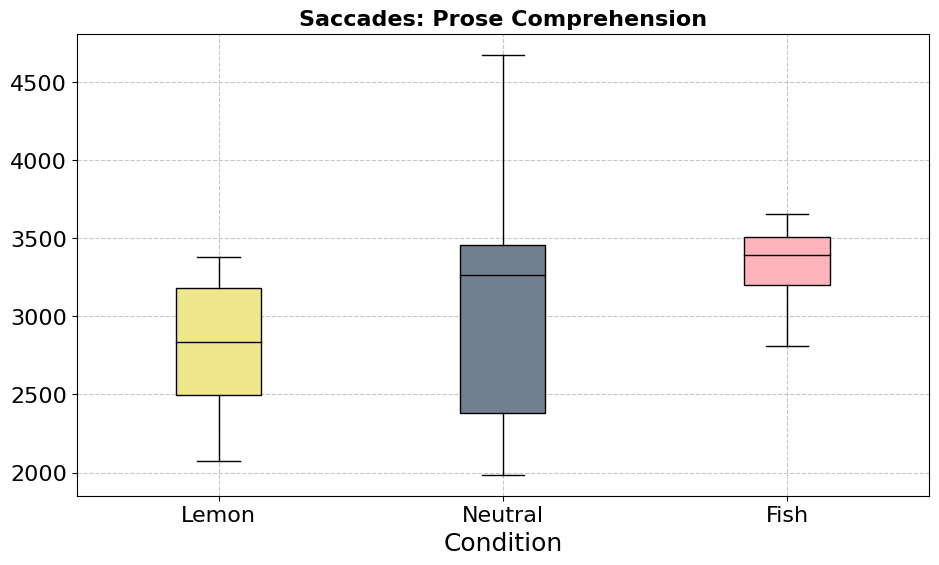

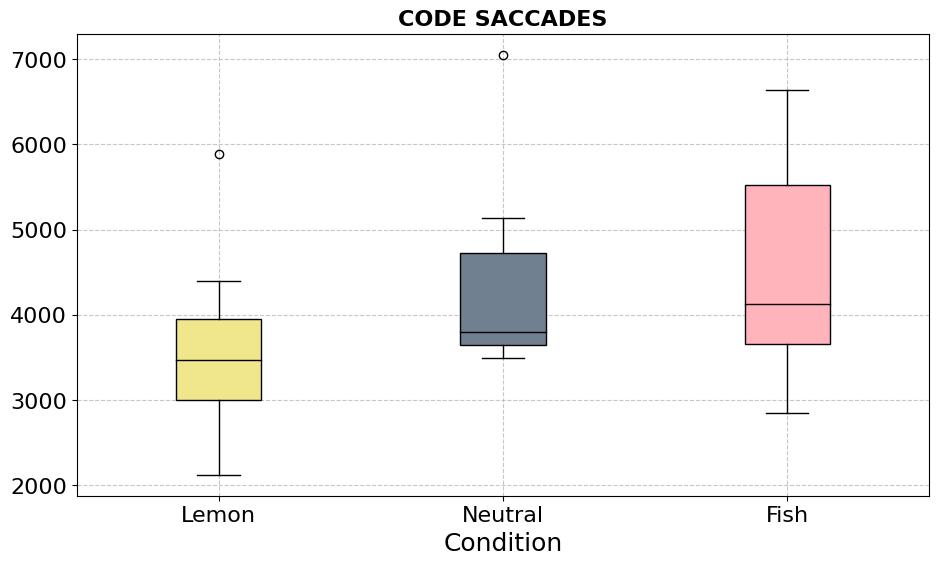

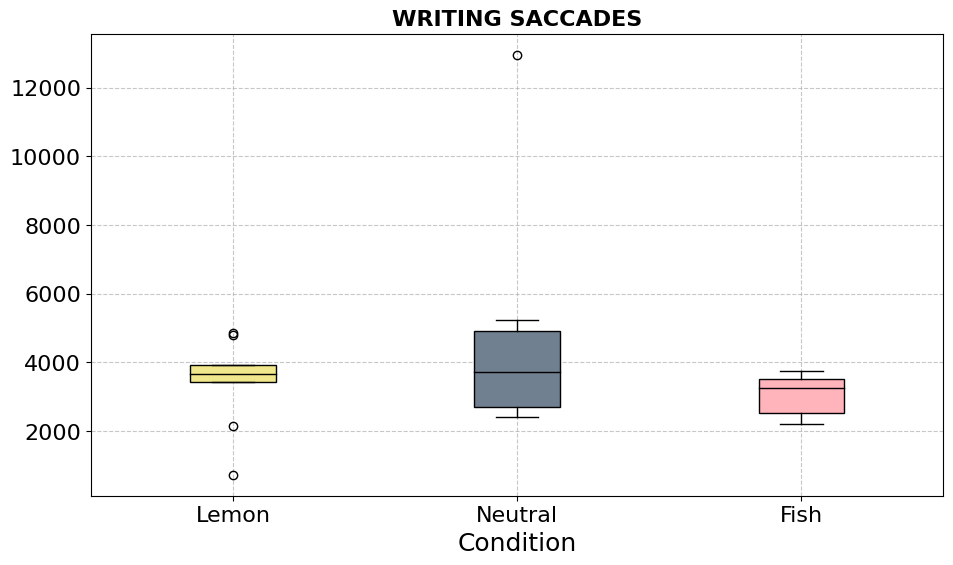

In [18]:
prose_saccades = three_lists_stats(fish_list=pd.Series(prose_saccades['fish']), 
                  lemon_list=pd.Series(prose_saccades['lemon']), 
                  neut_list=pd.Series(prose_saccades['neutral']), name='Saccades: Prose Comprehension')
prose_saccades = prose_saccades['Saccades: Prose Comprehension']

code_saccades = three_lists_stats(fish_list=pd.Series(ccd_saccades['fish']), 
                  lemon_list=pd.Series(ccd_saccades['lemon']), 
                  neut_list=pd.Series(ccd_saccades['neutral']), name='CODE SACCADES')
code_saccades = code_saccades['CODE SACCADES']

writing_saccades = three_lists_stats(fish_list=pd.Series(writing_saccades['fish']), 
                  lemon_list=pd.Series(writing_saccades['lemon']), 
                  neut_list=pd.Series(writing_saccades['neutral']), name='WRITING SACCADES')
writing_saccades = writing_saccades['WRITING SACCADES']

Saccades: Code Reading

Neutral: [3492.0, 3622.0, 3640.0, 3641.0, 3752.0, 3846.0, 4435.0, 4814.0, 5132.0]
Lemon: [2124.0, 2846.0, 2959.0, 3118.0, 3433.0, 3507.0, 3641.0, 4054.0, 4400.0]
Fish: [2848.0, 3325.0, 3550.0, 3993.0, 4026.0, 4221.0, 5421.0, 5551.0, 5732.0, 6633.0]

Neutral, num elements: 9, mean: 4041.5555555555557, std: 563.9495862242202, normal (above 0.05 is normal): 0.03165897727012634
Lemon, num elements: 9, mean: 3342.4444444444443, std: 639.2372383658357, normal (above 0.05 is normal): 0.9862914681434631
fish, num elements: 10, mean: 4530.0, std: 1165.4677172706245, normal (above 0.05 is normal): 0.5657269358634949
Kruskal-Wallis: H 6.076375581713654, P VAL: 0.047921654913099625

neutral v fish | U-stat: 35.0, p-val: 0.437942822899974, effect size: -0.4966106908203482, other effect size: -0.47437439123137737
neutral v lemon | U-stat: 64.5, p-val: 0.03787802139015178, effect size: 1.093498780436115, other effect size: 1.041427409939157
fish v lemon | U-stat: 70.0, p-val: 

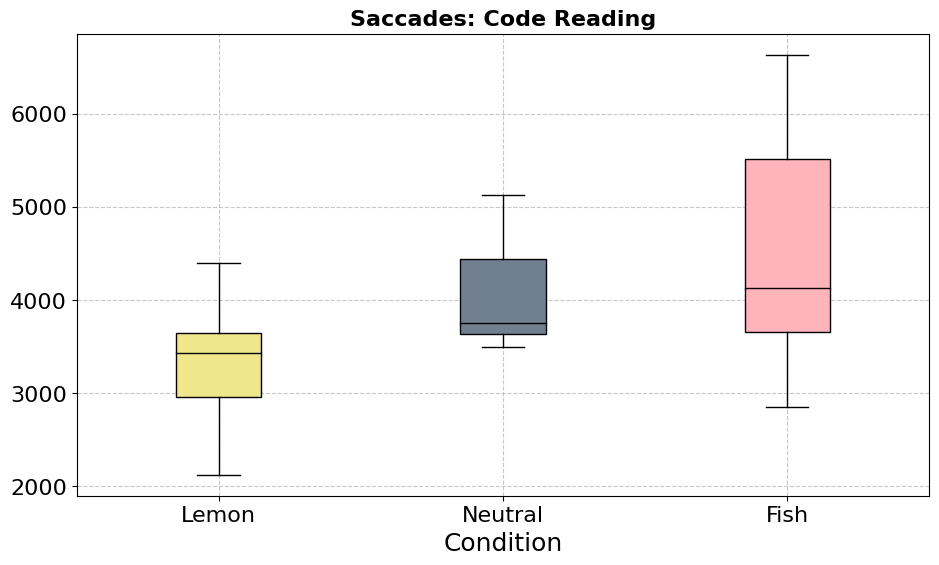

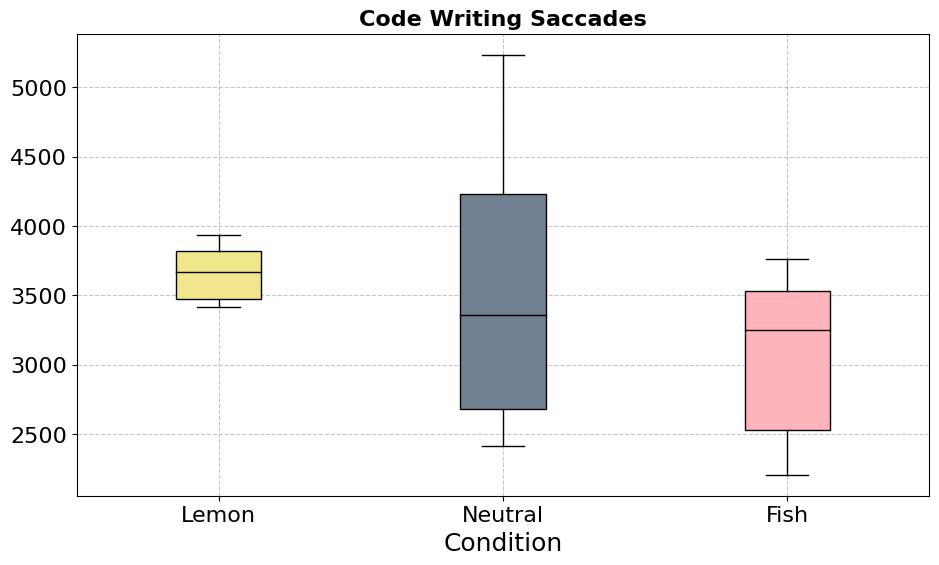

In [19]:
# need to remove the following
# code_saccades - lemon: remove max, neutral: remove max
code_saccades['lemon'] = code_saccades['lemon'][:-1]
code_saccades['neutral'] = code_saccades['neutral'][:-1]

# calculating stats
fish = pd.Series(code_saccades['fish'])
lemon = pd.Series(code_saccades['lemon'])
neutral = pd.Series(code_saccades['neutral'])
filtered_code = three_lists_stats(fish, lemon, neutral, 'Saccades: Code Reading')
code_saccades['CODE SACCADES'] = filtered_code['Saccades: Code Reading']

# writing_saccades - lemon: remove top 2 and bottom 2, neutral: remove max
writing_saccades['lemon'] = writing_saccades['lemon'][2:-2]
writing_saccades['neutral'] = writing_saccades['neutral'][:-1]

# calculating stats
fish = pd.Series(writing_saccades['fish'])
lemon = pd.Series(writing_saccades['lemon'])
neutral = pd.Series(writing_saccades['neutral'])
filtered_writing = three_lists_stats(fish, lemon, neutral, 'Code Writing Saccades')
writing_saccades['WRITING SACCADES'] = filtered_writing['Code Writing Saccades']


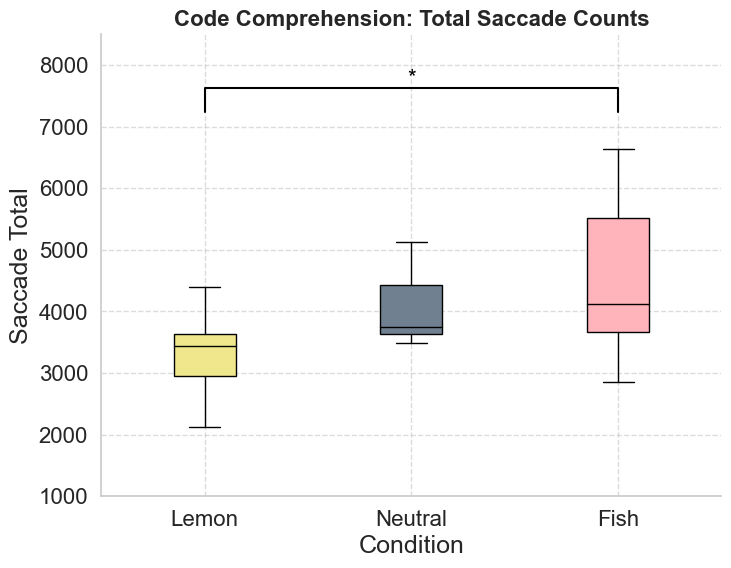

In [20]:
data = code_saccades

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating boxplot
plt.figure(figsize=(8, 6))
box = plt.boxplot(
    [data['lemon'], data['neutral'], data['fish']], 
    labels=['Lemon', 'Neutral', 'Fish'], 
    patch_artist=True, 
    boxprops=dict(facecolor='lightgray', color='black'),
    medianprops=dict(color='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black')
)

# Set individual colors for the boxes
colors = ['#F0E68C', '#708090', '#FFB3BA'] 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Adding title and labels
plt.title("Code Comprehension: Total Saccade Counts", fontsize=16, fontweight='bold')
plt.xlabel("Condition", fontsize=18)
plt.ylabel("Saccade Total", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Calculate p-value for significance (e.g., using a t-test)
t_stat, p_val = stats.ttest_ind(data['lemon'], data['fish'])

# Adding the significance annotation
x1, x2 = 1, 3  # positions for Lemon and Fish
y, h, col = max(max(data['lemon']), max(data['fish'])) + 600, 400, 'black'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, f"*", ha='center', va='bottom', fontsize=16, color=col)

ax = plt.gca()
ax.set_ylim([1000, 8500])

# Remove top and right spines for a cleaner look
sns.despine()
# plt.savefig("figures/saccade_code_box_plot.png", dpi=150)
plt.show()

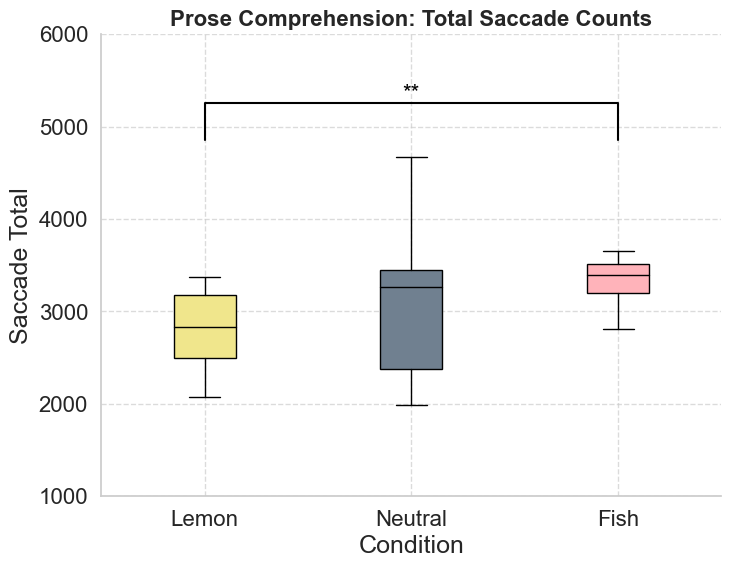

In [21]:
data = prose_saccades

sns.set(style="whitegrid")

# Creating boxplot
plt.figure(figsize=(8, 6))
box = plt.boxplot(
    [data['lemon'], data['neutral'], data['fish']], 
    labels=['Lemon', 'Neutral', 'Fish'], 
    patch_artist=True, 
    boxprops=dict(facecolor='lightgray', color='black'),
    medianprops=dict(color='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black')
)

# Set individual colors for the boxes
colors = ['#F0E68C', '#708090', '#FFB3BA'] 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Adding title and labels
plt.title("Prose Comprehension: Total Saccade Counts", fontsize=16, fontweight='bold')
plt.xlabel("Condition", fontsize=18)
plt.ylabel("Saccade Total", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Calculate p-value for significance (e.g., using a t-test)
t_stat, p_val = stats.ttest_ind(data['lemon'], data['fish'])

# Adding the significance annotation
x1, x2 = 1, 3  # positions for Lemon and Fish
y, h, col = max(max(data['lemon']), max(data['fish'])) + 1200, 400, 'black'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, f"**", ha='center', va='bottom', fontsize=16, color=col)

ax = plt.gca()
ax.set_ylim([1000, 6000])

# Remove top and right spines for a cleaner look
sns.despine()
# plt.savefig("figures/saccade_prose_box_plot.png", dpi=150)
# Show the plot
plt.show()

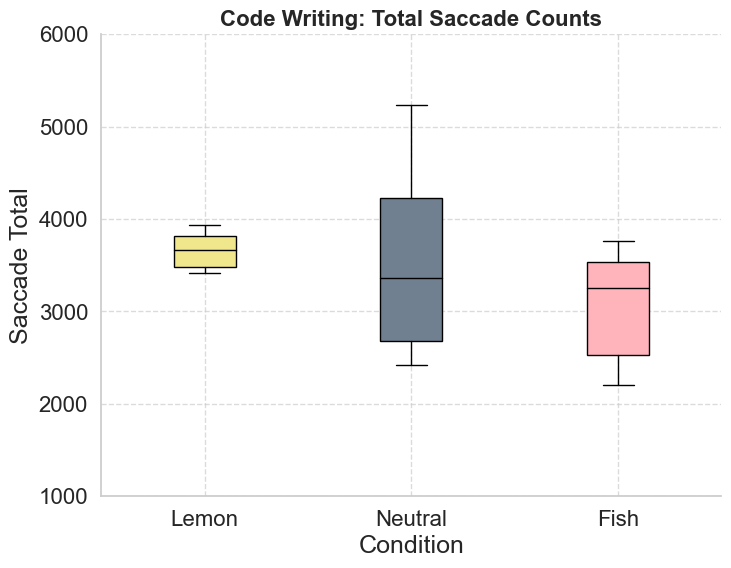

In [22]:
data = writing_saccades

sns.set(style="whitegrid")

# Creating boxplot
plt.figure(figsize=(8, 6))
box = plt.boxplot(
    [data['lemon'], data['neutral'], data['fish']], 
    labels=['Lemon', 'Neutral', 'Fish'], 
    patch_artist=True, 
    boxprops=dict(facecolor='lightgray', color='black'),
    medianprops=dict(color='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black')
)

# Set individual colors for the boxes
colors = ['#F0E68C', '#708090', '#FFB3BA'] 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Adding title and labels
plt.title("Code Writing: Total Saccade Counts", fontsize=16, fontweight='bold')
plt.xlabel("Condition", fontsize=18)
plt.ylabel("Saccade Total", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Calculate p-value for significance (e.g., using a t-test)
t_stat, p_val = stats.ttest_ind(data['lemon'], data['fish'])

ax = plt.gca()
ax.set_ylim([1000, 6000])

# Remove top and right spines for a cleaner look
sns.despine()
# plt.savefig("figures/saccade_writing_box_plot.png", dpi=150)
# Show the plot
plt.show()